In [75]:
# Взяты данные о демографии России в 1990-2017 г.
# источник: https://www.kaggle.com/dwdkills/russian-demography?select=russian_demography.csv
from pylab import rcParams
rcParams['figure.figsize'] = 10,7
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('russian_demography.csv')
print(df.shape)

(2380, 7)


D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='birth_rate', ylabel='Density'>

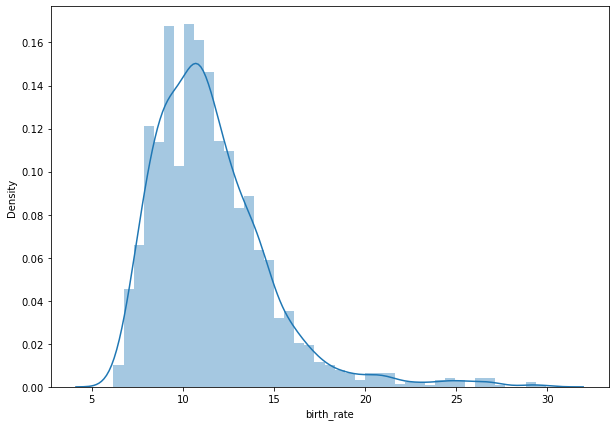

In [11]:
# распределение рождаемости в России (Рождаемость - число родившихся на 1000 человек)
sns.distplot(df.birth_rate)


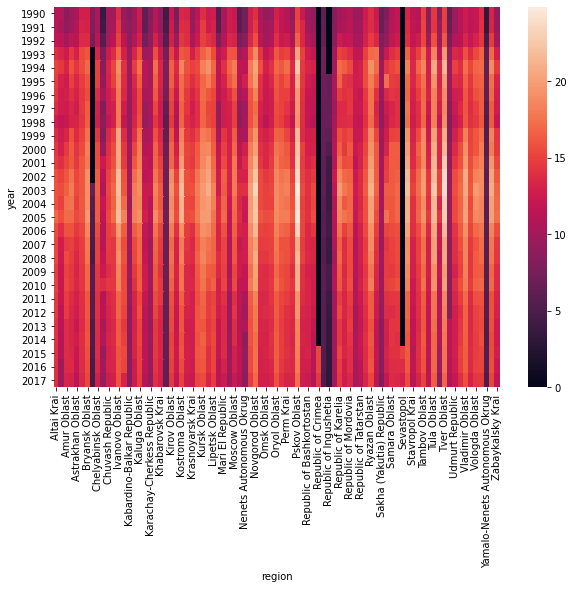

In [39]:
# Годовые смертности по регионам (Смертность - число смертей на 1000 человек)
annual_death_rate = df.pivot_table(
                        index='year', 
                        columns='region', 
                        values='death_rate', 
                        aggfunc=sum).fillna(0).applymap(float)

annual_death_rate
ax = sns.heatmap(annual_death_rate)

<AxesSubplot:>

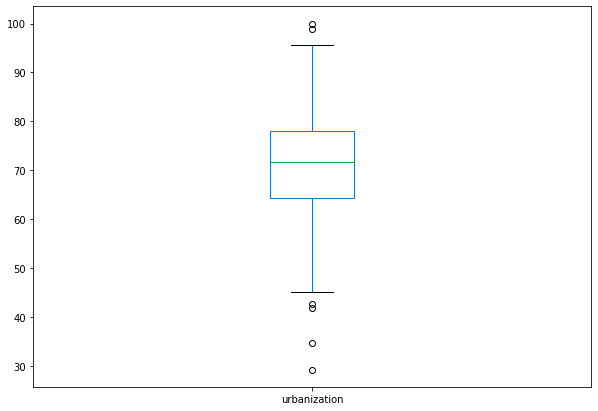

In [40]:
# Boxplot урбанизации в России в 2017 году
df[df["year"] == 2017]["urbanization"].plot.box()

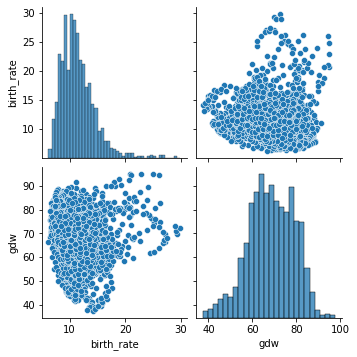

In [46]:
# Связь рождаемости и общего демографического веса (сколько человек нетрудоспособного возраста 
# приходится на 100 человек трудоспособного возраста) 
sns_plot = sns.pairplot(
    df[['birth_rate', 'gdw']])
sns_plot

<AxesSubplot:ylabel='npg'>

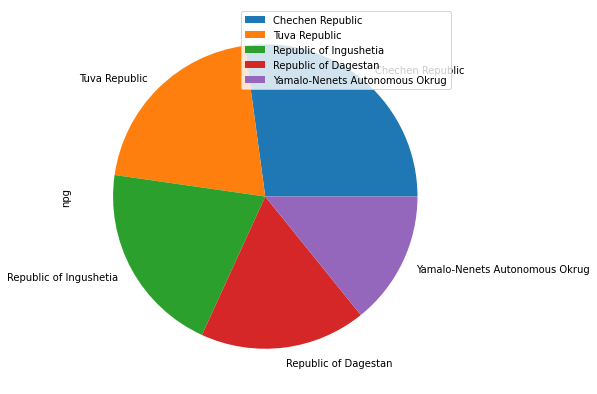

In [68]:
#круговая диаграмма естественного прироста населения на 1000 человек среди топ5 регионов по данному показателю
top5_npg_regions = df[df["year"]==2017][["region","npg"]].sort_values('npg',ascending=False).head(5)
top5_npg_regions.plot(kind='pie', y='npg',labels=top5_npg_regions["region"])

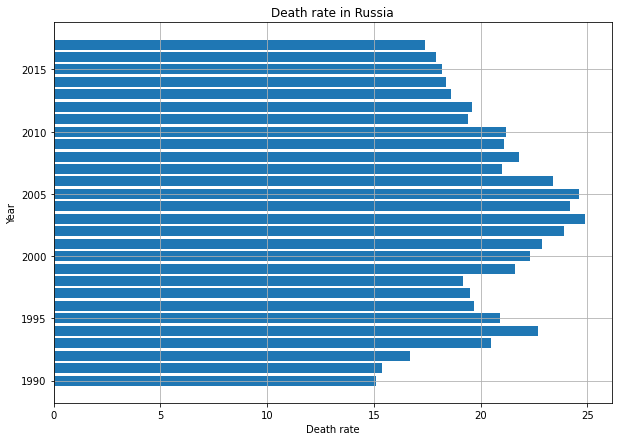

In [74]:
# Смертность в России
plt.barh(df["year"],df["death_rate"])
plt.xlabel('Death rate')
plt.ylabel('Year')
plt.title('Death rate in Russia')
plt.grid()